In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
# import dataset
df = pd.read_csv("../HackathonData//Train_Combined/train_combined_Species.csv", sep = ',')

In [14]:
# Drop the index column
df.drop(df.columns[0], axis=1, inplace=True)

In [15]:
# Selecting features X and target Y
X = df.drop("label", axis=1)
y = df["label"]

In [16]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
# Create a pipeline that first performs feature scaling, PCA, and feature selection, and then trains a SVM Classifier
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=10)),
    ('feature_selection', SelectKBest(f_classif, k=5)),
    ('classifier', SVC(random_state=42))
])

In [18]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=10)),
                ('feature_selection', SelectKBest(k=5)),
                ('classifier', SVC(random_state=42))])

In [19]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

In [20]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.49504950495049505


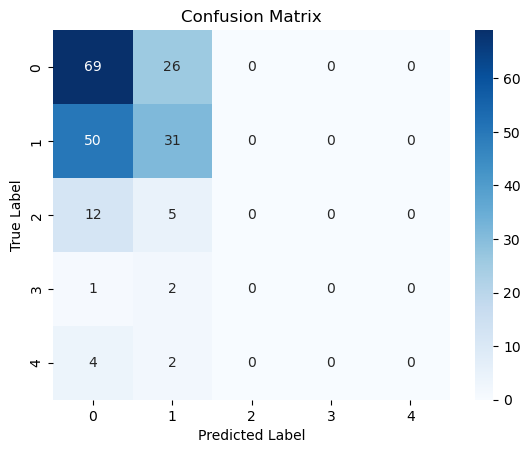

In [21]:
# Plot the confusion matrix
confusion_matrix_ = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix_, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()